In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression as mi_reg

pd.set_option('max_colwidth', 100)
root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling/'
samplings = pd.read_csv(root_folder + 'data/syn_graphs/aggr_data/samplings/set_1_3_6_8_9_10_with_features.csv')
#samplings.columns[samplings.isna().any()].tolist()

#print(samplings.columns)
# for MI only
#samplings = samplings.rename(columns={ '|N|/|E|' : 'node_count/edge_count', '|E|/|N|' : 'edge_count/node_count', 'sampling_percent': 'rate', 'node_nums': '|N|', 'edge_nums':'|E|', 'min_degree': 'Deg_min', 'max_degree': 'Deg_max', 'mean_degree': 'Deg_mean', 'var_degree':'deg_var', 'median_degree': 'deg_med', 'graph_density': 'D', 'min_clust_coeff': 'CC_min', 'max_clust_coeff': 'CC_max', 'mean_clust_coeff': 'CC_mean', 'var_clust_coeff': 'CC_var', 'median_clust_coeff': 'CC_med', 'clust_coeff_calc_time': 'CC_t', 'min_node_betweenness_centrality': 'NBC_min', 'max_node_betweenness_centrality': 'NBC_max', 'mean_node_betweenness_centrality': 'NBC_mean', 'var_node_betweenness_centrality': 'NBC_var', 'median_node_betweenness_centrality': 'NBC_med', 'node_edge_betweenness_centrality_calc_time': 'NEBC_t', 'min_edge_betweenness_centrality': 'EBC_min', 'max_edge_betweenness_centrality': 'EBC_max', 'mean_edge_betweenness_centrality': 'EBC_mean', 'var_edge_betweenness_centrality': 'EBC_var', 'median_edge_betweenness_centrality': 'EBC_med', 'min_eccentricity_centrality': 'ECC_min', 'max_eccentricity_centrality': 'ECC_max', 'mean_eccentricity_centrality': 'ECC_mean', 'median_eccentricity_centrality': 'ECC_med', 'var_eccentricity_centrality': 'ECC_var', 'num_connected_components': '|ConC|', 'max_connected_components_size': 'ConCS_max', 'min_connected_components_size': 'ConCS_min', 'mean_connected_components_size': 'ConCS_mean', 'var_connected_components_size': 'ConCS_var', 'median_connected_components_size': 'ConCS_med', 'connected_components_calc_time': 'ConC_t', 'node_nums_div_edge_nums': '|N|/|E|', 'edge_nums_div_node_nums': '|E|/|N|', 'entropy_degrees': 'H(deg)', 'entropy_clust_coeff': 'H(CC)', 'min_eigenvector_centrality': 'EIC_min', 'max_eigenvector_centrality':'EIC_max', 'mean_eigenvector_centrality': 'EIC_mean', 'var_eigenvector_centrality': 'EIC_var', 'median_eigenvector_centrality': 'EIC_med', 'eigenvector_centrality_calc_time': 'EIC_t', 'min_pagerank_centrality': 'PRC_min', 'max_pagerank_centrality': 'PRC_max', 'mean_pagerank_centrality': 'PRC_mean', 'var_pagerank_centrality': 'PRC_var', 'median_pagerank_centrality': 'PRC_med', 'pagerank_centrality_calc_time': 'PRC_t', 'max_degrees_max_spanning_tree': 'DMST_max', 'min_degrees_max_spanning_tree': 'DMST_min', 'mean_degrees_max_spanning_tree': 'DMST_mean', 'var_degrees_max_spanning_tree': 'DMST_var', 'median_degrees_max_spanning_tree': 'DMST_med', 'max_spanning_tree_calc_time': 'MST_t', 'diameter': 'dia', 'diameter_calc_time': 'dia_t', 'global_clust_coeff': 'GCC', 'global_clust_coeff_calc_time': 'GCC_t', 'min_farness_centrality': 'FC_min', 'max_farness_centrality': 'FC_max', 'var_farness_centrality': 'FC_var', 'mean_farness_centrality': 'FC_mean', 'median_farness_centrality': 'FC_med', 'farness_centrality_calc_time': 'FC_t', 'min_shortest_path_length_LCC': 'SPL_min', 'max_shortest_path_length_LCC': 'SPL_max', 'var_shortest_path_length_LCC': 'SPL_var', 'median_shortest_path_length_LCC' : 'SPL_med', 'mean_shortest_path_length_LCC': 'SPL_mean', 'shortest_path_length_LCC_calc_time': 'SPL_t', 'degree_assortativity': 'Assor_deg', 'degree_assortativity_calc_time': 'Assor_deg_t'})
# for prediction
#samplings = samplings.rename(columns={ 'node_nums_div_edge_nums' : 'node_count/edge_count', 'edge_nums_div_node_nums' : 'edge_count/node_count', 'min_degree': 'degree_min', 'max_degree': 'degree_max', 'mean_degree': 'degree_avg', 'var_degree':'degree_var', 'median_degree': 'degree_median', 'min_clust_coeff': 'clust_coeff_min', 'max_clust_coeff': 'clust_coeff_max', 'mean_clust_coeff': 'clust_coeff_avg', 'var_clust_coeff': 'clust_coeff_var', 'median_clust_coeff': 'clust_coeff_median', 'min_node_betweenness_centrality': 'node_betweenness_centrality_min', 'max_node_betweenness_centrality': 'node_betweenness_centrality_max', 'mean_node_betweenness_centrality': 'node_betweenness_centrality_avg', 'var_node_betweenness_centrality': 'node_betweenness_centrality_var', 'median_node_betweenness_centrality': 'node_betweenness_centrality_median', 'min_edge_betweenness_centrality': 'EBC_min', 'max_edge_betweenness_centrality': 'EBC_max', 'mean_edge_betweenness_centrality': 'EBC_mean', 'var_edge_betweenness_centrality': 'EBC_var', 'median_edge_betweenness_centrality': 'EBC_med', 'min_eccentricity_centrality': 'ECC_min', 'max_eccentricity_centrality': 'ECC_max', 'mean_eccentricity_centrality': 'ECC_mean', 'median_eccentricity_centrality': 'ECC_med', 'var_eccentricity_centrality': 'ECC_var', 'min_eigenvector_centrality': 'eigenvector_centrality_min', 'max_eigenvector_centrality':'eigenvector_centrality_min', 'mean_eigenvector_centrality': 'eigenvector_centrality_avg', 'var_eigenvector_centrality': 'eigenvector_centrality_var', 'median_eigenvector_centrality': 'eigenvector_centrality_median',  'min_pagerank_centrality': 'pagerank_centrality_min', 'max_pagerank_centrality': 'pagerank_centrality_max', 'mean_pagerank_centrality': 'pagerank_centrality_avg', 'var_pagerank_centrality': 'pagerank_centrality_var', 'median_pagerank_centrality': 'pagerank_centrality_median', 'max_degrees_max_spanning_tree': 'degrees_spanning_tree_max', 'min_degrees_max_spanning_tree': 'degrees_spanning_tree_min', 'mean_degrees_max_spanning_tree': 'degrees_spanning_tree_avg', 'var_degrees_max_spanning_tree': 'degrees_spanning_tree_var', 'median_degrees_max_spanning_tree': 'degrees_spanning_tree_median', 'diameter': 'dia', 'diameter_calc_time': 'dia_t', 'min_farness_centrality': 'FC_min', 'max_farness_centrality': 'FC_max', 'var_farness_centrality': 'FC_var', 'mean_farness_centrality': 'FC_mean', 'median_farness_centrality': 'FC_med', 'farness_centrality_calc_time': 'FC_t', 'min_shortest_path_length_LCC': 'shortest_path_length_min', 'max_shortest_path_length_LCC': 'shortest_path_length_max', 'var_shortest_path_length_LCC': 'shortest_path_length_var', 'median_shortest_path_length_LCC' : 'shortest_path_length_median', 'mean_shortest_path_length_LCC': 'shortest_path_length_avg'})
print(samplings.columns)
print(samplings.shape)
samplings_temp = samplings.drop(columns = ['graph_ID', 'sampling_algorithm', 'Unnamed: 0', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var',
       'KS hop plots Distr var', 'KS hop plots LCC Distr var'])
indep_vars = ['run_time', 'D3', 'C2D2', 'HPD2', 'HPD2_LCC'] # set independent vars
dep_vars = samplings_temp.columns.difference(indep_vars).tolist() # set dependent vars

df_mi = pd.DataFrame([mi_reg(samplings_temp[indep_vars], samplings_temp[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)
df_mi


Index(['Unnamed: 0', 'graph_ID', 'min_clust_coeff', 'max_clust_coeff',
       'mean_clust_coeff', 'var_clust_coeff', 'median_clust_coeff',
       'clust_coeff_calc_time', 'min_node_betweenness_centrality',
       'max_node_betweenness_centrality', 'mean_node_betweenness_centrality',
       'var_node_betweenness_centrality', 'median_node_betweenness_centrality',
       'num_connected_components', 'max_connected_components_size',
       'min_connected_components_size', 'mean_connected_components_size',
       'var_connected_components_size', 'median_connected_components_size',
       'connected_components_calc_time', 'min_eigenvector_centrality',
       'max_eigenvector_centrality', 'mean_eigenvector_centrality',
       'var_eigenvector_centrality', 'median_eigenvector_centrality',
       'eigenvector_centrality_calc_time', 'min_pagerank_centrality',
       'max_pagerank_centrality', 'mean_pagerank_centrality',
       'var_pagerank_centrality', 'median_pagerank_centrality',
       'pager

,run_time,D3,C2D2,HPD2,HPD2_LCC
clust_coeff_calc_time,0.013659,1.000000,0.628986,0.389708,0.336418
connected_components_calc_time,0.067053,1.000000,0.745279,0.418982,0.409455
degree_assortativity,0.023492,1.000000,0.602255,0.406263,0.389964
degree_assortativity_calc_time,0.048862,1.000000,0.836886,0.479187,0.443746
edge_nums,0.141920,1.000000,0.511532,0.320731,0.310961
edge_nums_div_node_nums,0.051046,1.000000,0.381560,0.301719,0.266141
eigenvector_centrality_calc_time,0.052448,1.000000,0.857238,0.434219,0.426819
graph_density,0.135743,1.000000,0.597237,0.425229,0.358503
max_clust_coeff,0.040202,1.000000,0.415692,0.309054,0.251632
max_connected_components_size,0.406824,0.753777,1.000000,0.432646,0.391369


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

samplings_temp = samplings.drop(columns = ['graph_ID'])

samplings_FF = samplings_temp[samplings_temp['sampling_algorithm'] == 'forest fire'].drop(columns = ['sampling_algorithm'])
ff_mi = pd.DataFrame([mi_reg(samplings_FF[indep_vars], samplings_FF[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RJ = samplings_temp[samplings_temp['sampling_algorithm'] == 'random jump'].drop(columns = ['sampling_algorithm'])
rj_mi = pd.DataFrame([mi_reg(samplings_RJ[indep_vars], samplings_RJ[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RN = samplings_temp[samplings_temp['sampling_algorithm'] == 'random node'].drop(columns = ['sampling_algorithm'])
rn_mi = pd.DataFrame([mi_reg(samplings_RN[indep_vars], samplings_RN[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RNE = samplings_temp[samplings_temp['sampling_algorithm'] == 'random node edge'].drop(columns = ['sampling_algorithm'])
rne_mi = pd.DataFrame([mi_reg(samplings_RNE[indep_vars], samplings_RNE[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RE = samplings_temp[samplings_temp['sampling_algorithm'] == 'random edge'].drop(columns = ['sampling_algorithm'])
re_mi = pd.DataFrame([mi_reg(samplings_RE[indep_vars], samplings_RE[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RDN = samplings_temp[samplings_temp['sampling_algorithm'] == 'random degree node'].drop(columns = ['sampling_algorithm'])
rdn_mi = pd.DataFrame([mi_reg(samplings_RDN[indep_vars], samplings_RDN[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_FS = samplings_temp[samplings_temp['sampling_algorithm'] == 'frontier'].drop(columns = ['sampling_algorithm'])
fs_mi = pd.DataFrame([mi_reg(samplings_FS[indep_vars], samplings_FS[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_SB = samplings_temp[samplings_temp['sampling_algorithm'] == 'snowball'].drop(columns = ['sampling_algorithm'])
sb_mi = pd.DataFrame([mi_reg(samplings_SB[indep_vars], samplings_SB[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_RD = samplings_temp[samplings_temp['sampling_algorithm'] == 'rank degree'].drop(columns = ['sampling_algorithm'])
rd_mi = pd.DataFrame([mi_reg(samplings_RD[indep_vars], samplings_RD[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_IRE = samplings_temp[samplings_temp['sampling_algorithm'] == 'induced random edge'].drop(columns = ['sampling_algorithm'])
ire_mi = pd.DataFrame([mi_reg(samplings_IRE[indep_vars], samplings_IRE[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_MHRW = samplings_temp[samplings_temp['sampling_algorithm'] == 'metropolis hastings random walk'].drop(columns = ['sampling_algorithm'])
mhrw_mi = pd.DataFrame([mi_reg(samplings_MHRW[indep_vars], samplings_MHRW[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

samplings_XS = samplings_temp[samplings_temp['sampling_algorithm'] == 'expansion'].drop(columns = ['sampling_algorithm'])
xs_mi = pd.DataFrame([mi_reg(samplings_XS[indep_vars], samplings_XS[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)


['All', 'FF', 'FS', 'IRE', 'MHRW', 'RD', 'RDN', 'RE', 'RJ', 'RN', 'RNE', 'SB', 'XS']
d3 features  ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity', 'degree_assortativity_calc_time', 'edge_nums', 'edge_count/node_count', 'eigenvector_centrality_calc_time', 'graph_density', 'clust_coeff_max', 'max_connected_components_size', 'degree_max', 'degrees_spanning_tree_max', 'eigenvector_centrality_max', 'node_betweenness_centrality_max', 'pagerank_centrality_max', 'shortest_path_length_max', 'max_spanning_tree_calc_time', 'clust_coeff_avg', 'mean_connected_components_size', 'degree_avg', 'degrees_spanning_tree_avg', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg', 'shortest_path_length_avg', 'clust_coeff_median', 'median_connected_components_size', 'degree_median', 'degrees_spanning_tree_median', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median', 'clust_coeff_min', 'min_connected_components_size'

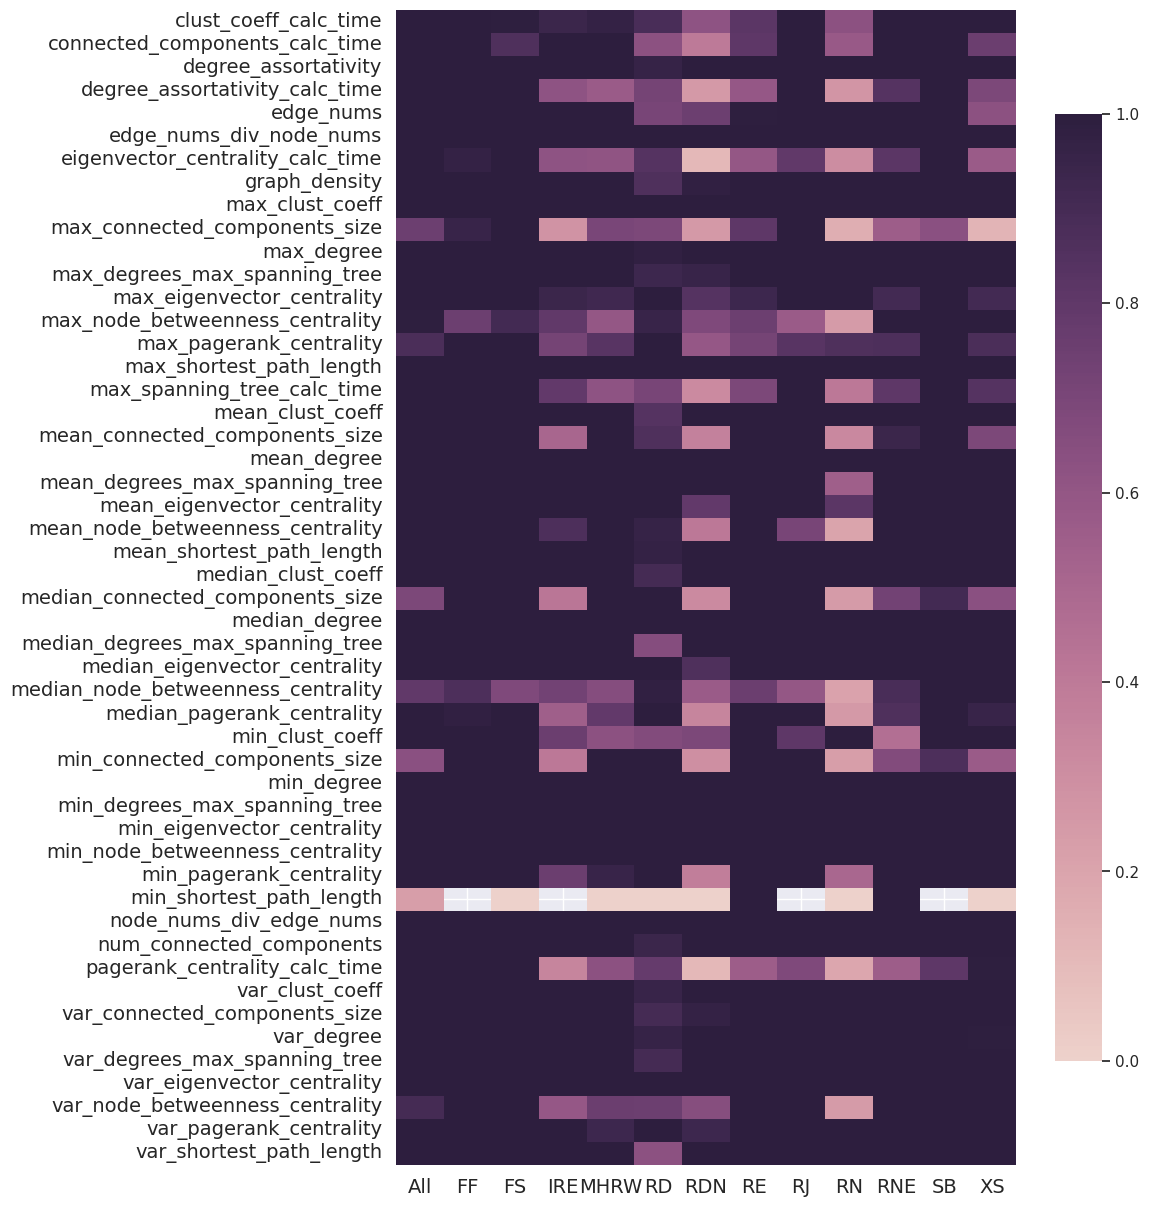

In [ ]:
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] =10, 15
sns.set(font_scale=1)

df_all = [df_mi[['D3']].rename(columns={'D3': 'All'}), ff_mi[['D3']].rename(columns={'D3': 'FF'}), fs_mi[['D3']].rename(columns={'D3': 'FS'}), ire_mi[['D3']].rename(columns={'D3': 'IRE'}),  mhrw_mi[['D3']].rename(columns={'D3': 'MHRW'}),  rd_mi[['D3']].rename(columns={'D3': 'RD'}),  rdn_mi[['D3']].rename(columns={'D3': 'RDN'}),  re_mi[['D3']].rename(columns={'D3': 'RE'}),  rj_mi[['D3']].rename(columns={'D3': 'RJ'}),  rn_mi[['D3']].rename(columns={'D3': 'RN'}),  rne_mi[['D3']].rename(columns={'D3': 'RNE'}),  sb_mi[['D3']].rename(columns={'D3': 'SB'}), xs_mi[['D3']].rename(columns={'D3': 'XS'})]
res = pd.concat(df_all, axis=1)
res = res.round(2)
#res = res.drop(['run_time', 'D3', 'C2D2', 'KS WCC sizes Distr', 'HPD2', 'HPD2_LCC', 'run_time var', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var', 'KS WCC sizes Distr var', 'GCCs RMSE'])
#res = res.drop(index=['EBC_max', 'ECC_min', 'ECC_max', 'ECC_med', 'FC_max', 'FC_med', 'SPL_med', 'SPL_max'])
res = res[(res > 0.99).any(axis=1) | (res < -0.99).any(axis=1)]
col_list = []
for col in res.columns:
  if (res[col] > 0.99).any() or (res[col] < -0.99).any():
    col_list.append(col)
print(col_list)
res_1 = res[col_list]
res_1 = res_1.round(2)
#res_1 = res_1.drop(['CC_max', 'CC_mean', 'CC_med', 'CC_min', 'DMST_med', 'DMST_var', 'Deg_mean',
#       'EBC_max', 'EBC_mean', 'EBC_med', 'EBC_min',
#       'ECC_max', 'ECC_mean', 'ECC_med', 'ECC_min',
#        'EIC_min', 'EIC_med', 'EIC_mean', 'EIC_max', 'FC_med', 'FC_mean' ,'FC_max', 'FC_min', 'NBC_max', 'NBC_mean', 'NBC_med', 'NBC_min',
#       'PRC_max', 'PRC_med', 'PRC_min', 'SPL_max', 'SPL_mean','SPL_min',
#      'SPL_var','deg_var', '|E|',
#       '|E|/|N|'])
heatmap_d3 = sns.heatmap(res_1, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar_kws={"shrink": .82})
heatmap_d3.set_yticklabels(heatmap_d3.get_ymajorticklabels(), fontsize = 14)
heatmap_d3.set_xticklabels(heatmap_d3.get_xmajorticklabels(), fontsize = 14)
#heatmap_d3.set_ylabel('Feature',fontdict={'fontsize':24})
heatmap_d3.get_figure().savefig(root_folder + 'data/syn_graphs/aggr_data/results/MI/set_1_3_6_8_9_10_mi_heatmap_d3.png', dpi=400,  bbox_inches="tight")
feature_mappings = { 'node_nums_div_edge_nums' : 'node_count/edge_count', 'edge_nums_div_node_nums' : 'edge_count/node_count', 'min_degree': 'degree_min', 'max_degree': 'degree_max', 'mean_degree': 'degree_avg', 'var_degree':'degree_var', 'median_degree': 'degree_median', 'min_clust_coeff': 'clust_coeff_min', 'max_clust_coeff': 'clust_coeff_max', 'mean_clust_coeff': 'clust_coeff_avg', 'var_clust_coeff': 'clust_coeff_var', 'median_clust_coeff': 'clust_coeff_median', 'min_node_betweenness_centrality': 'node_betweenness_centrality_min', 'max_node_betweenness_centrality': 'node_betweenness_centrality_max', 'mean_node_betweenness_centrality': 'node_betweenness_centrality_avg', 'var_node_betweenness_centrality': 'node_betweenness_centrality_var', 'median_node_betweenness_centrality': 'node_betweenness_centrality_median', 'min_edge_betweenness_centrality': 'EBC_min', 'max_edge_betweenness_centrality': 'EBC_max', 'mean_edge_betweenness_centrality': 'EBC_mean', 'var_edge_betweenness_centrality': 'EBC_var', 'median_edge_betweenness_centrality': 'EBC_med', 'min_eccentricity_centrality': 'ECC_min', 'max_eccentricity_centrality': 'ECC_max', 'mean_eccentricity_centrality': 'ECC_mean', 'median_eccentricity_centrality': 'ECC_med', 'var_eccentricity_centrality': 'ECC_var', 'min_eigenvector_centrality': 'eigenvector_centrality_min', 'max_eigenvector_centrality':'eigenvector_centrality_max', 'mean_eigenvector_centrality': 'eigenvector_centrality_avg', 'var_eigenvector_centrality': 'eigenvector_centrality_var', 'median_eigenvector_centrality': 'eigenvector_centrality_median',  'min_pagerank_centrality': 'pagerank_centrality_min', 'max_pagerank_centrality': 'pagerank_centrality_max', 'mean_pagerank_centrality': 'pagerank_centrality_avg', 'var_pagerank_centrality': 'pagerank_centrality_var', 'median_pagerank_centrality': 'pagerank_centrality_median', 'max_degrees_max_spanning_tree': 'degrees_spanning_tree_max', 'min_degrees_max_spanning_tree': 'degrees_spanning_tree_min', 'mean_degrees_max_spanning_tree': 'degrees_spanning_tree_avg', 'var_degrees_max_spanning_tree': 'degrees_spanning_tree_var', 'median_degrees_max_spanning_tree': 'degrees_spanning_tree_median', 'diameter': 'dia', 'diameter_calc_time': 'dia_t', 'min_farness_centrality': 'FC_min', 'max_farness_centrality': 'FC_max', 'var_farness_centrality': 'FC_var', 'mean_farness_centrality': 'FC_mean', 'median_farness_centrality': 'FC_med', 'farness_centrality_calc_time': 'FC_t', 'min_shortest_path_length_LCC': 'shortest_path_length_lcc_min', 'max_shortest_path_length_LCC': 'shortest_path_length_lcc_max', 'var_shortest_path_length_LCC': 'shortest_path_length_lcc_var', 'median_shortest_path_length_LCC' : 'shortest_path_length_lcc_median', 'mean_shortest_path_length_LCC': 'shortest_path_length_lcc_avg',  'mean_shortest_path_length': 'shortest_path_length_avg',  'min_shortest_path_length': 'shortest_path_length_min',  'max_shortest_path_length': 'shortest_path_length_max',  'median_shortest_path_length': 'shortest_path_length_median',  'var_shortest_path_length': 'shortest_path_length_var'}
# print features
high_corr_features_list = []
for feature in list(res_1.index):
  if feature in feature_mappings:
    feature = feature_mappings[feature]
  #if not 'calc_t' in feature:
  high_corr_features_list.append(feature)

print('d3 features ', high_corr_features_list)

['All', 'FF', 'FS', 'IRE', 'MHRW', 'RD', 'RDN', 'RE', 'RJ', 'RN', 'RNE', 'XS']
features  ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity', 'degree_assortativity_calc_time', 'eigenvector_centrality_calc_time', 'max_connected_components_size', 'eigenvector_centrality_max', 'node_betweenness_centrality_max', 'pagerank_centrality_max', 'max_spanning_tree_calc_time', 'clust_coeff_avg', 'mean_connected_components_size', 'degrees_spanning_tree_avg', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg', 'pagerank_centrality_avg', 'shortest_path_length_avg', 'clust_coeff_median', 'median_connected_components_size', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median', 'clust_coeff_min', 'min_connected_components_size', 'node_betweenness_centrality_min', 'pagerank_centrality_min', 'shortest_path_length_min', 'node_nums', 'pagerank_centrality_calc_time', 'sampling_percent', 'clust_coeff_var', 'degree_var',

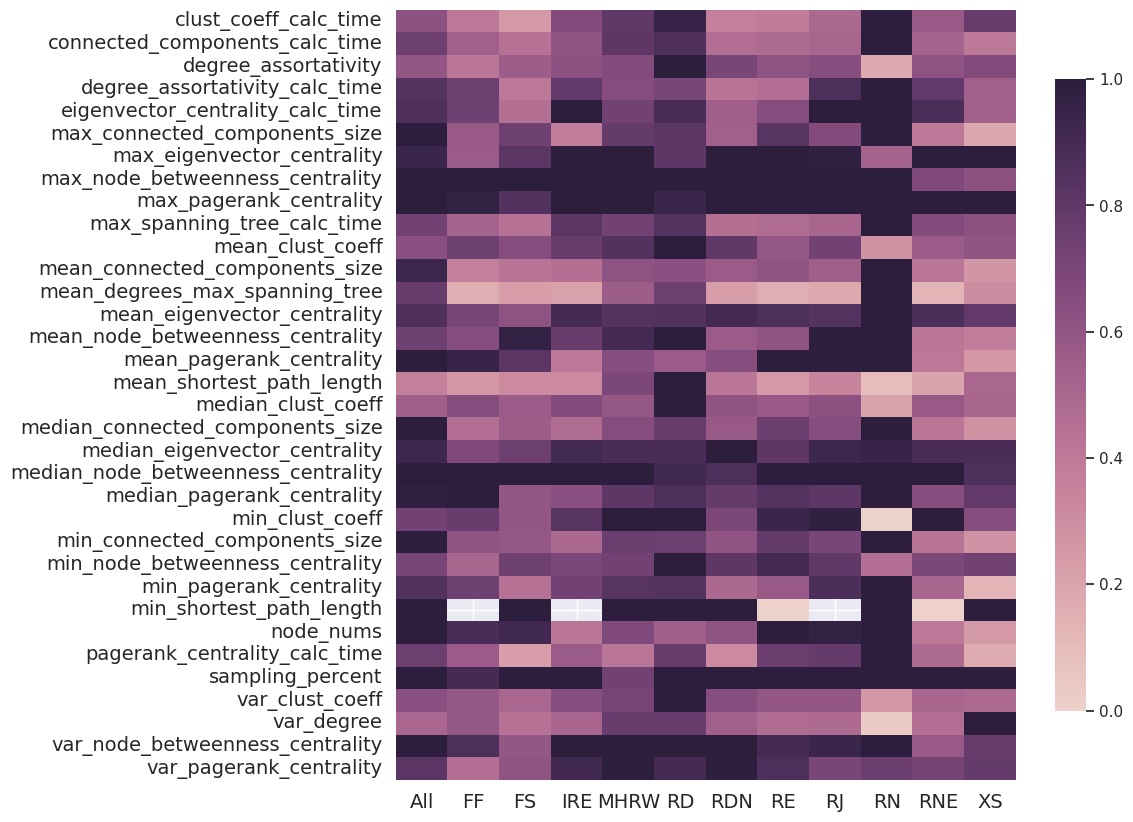

In [ ]:
matplotlib.rcParams['figure.figsize'] =10, 10
sns.set(font_scale=1)

df_all = [df_mi[['C2D2']].rename(columns={'C2D2': 'All'}), ff_mi[['C2D2']].rename(columns={'C2D2': 'FF'}), fs_mi[['C2D2']].rename(columns={'C2D2': 'FS'}), ire_mi[['C2D2']].rename(columns={'C2D2': 'IRE'}),  mhrw_mi[['C2D2']].rename(columns={'C2D2': 'MHRW'}),  rd_mi[['C2D2']].rename(columns={'C2D2': 'RD'}),  rdn_mi[['C2D2']].rename(columns={'C2D2': 'RDN'}),  re_mi[['C2D2']].rename(columns={'C2D2': 'RE'}),  rj_mi[['C2D2']].rename(columns={'C2D2': 'RJ'}),  rn_mi[['C2D2']].rename(columns={'C2D2': 'RN'}),  rne_mi[['C2D2']].rename(columns={'C2D2': 'RNE'}),  sb_mi[['C2D2']].rename(columns={'C2D2': 'SB'}), xs_mi[['C2D2']].rename(columns={'C2D2': 'XS'})]
res = pd.concat(df_all, axis=1)
res = res.round(2)
#res = res.drop(['run_time', 'D3', 'C2D2', 'KS WCC sizes Distr', 'HPD2', 'HPD2_LCC', 'run_time var', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var', 'KS WCC sizes Distr var', 'GCCs RMSE'])
#res = res.drop(index=['EBC_max', 'ECC_min', 'ECC_max', 'ECC_med', 'FC_max', 'FC_med', 'SPL_med', 'SPL_max'])
res = res[(res > 0.99).any(axis=1) | (res < -0.99).any(axis=1)]
col_list = []
for col in res.columns:
  if (res[col] > 0.99).any() or (res[col] < -0.99).any():
    col_list.append(col)
print(col_list)
res_1 = res[col_list]
res_1 = res_1.round(2)
#res_1 = res_1.drop(['CC_max', 'CC_mean', 'CC_med', 'CC_min', 'DMST_med', 'DMST_var', 'Deg_mean',
#       'EBC_max', 'EBC_mean', 'EBC_med', 'EBC_min',
#       'ECC_max', 'ECC_mean', 'ECC_med', 'ECC_min',
#        'EIC_min', 'EIC_med', 'EIC_mean', 'EIC_max', 'FC_med', 'FC_mean' ,'FC_max', 'FC_min', 'NBC_max', 'NBC_mean', 'NBC_med', 'NBC_min',
#       'PRC_max', 'PRC_med', 'PRC_min', 'SPL_max', 'SPL_mean','SPL_min',
#      'SPL_var','deg_var', '|E|',
#       '|E|/|N|'])
heatmap = sns.heatmap(res_1, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar_kws={"shrink": .82})
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
#heatmap_d3.set_ylabel('Feature',fontdict={'fontsize':24})
heatmap.get_figure().savefig(root_folder + 'data/syn_graphs/aggr_data/results/MI/set_1_3_6_8_9_10_mi_heatmap_c2d2.png', dpi=400,  bbox_inches="tight")
# print features
high_corr_features_list = []
for feature in list(res_1.index):
  if feature in feature_mappings:
    feature = feature_mappings[feature]
  #if not 'calc_t' in feature:
  high_corr_features_list.append(feature)

print('features ', high_corr_features_list)

['FS', 'IRE', 'MHRW', 'RD', 'RDN', 'RJ', 'XS']
features  ['connected_components_calc_time', 'degrees_spanning_tree_max', 'pagerank_centrality_avg', 'degrees_spanning_tree_median', 'clust_coeff_min', 'shortest_path_length_min', 'node_nums', 'sampling_percent', 'var_connected_components_size', 'shortest_path_length_var']


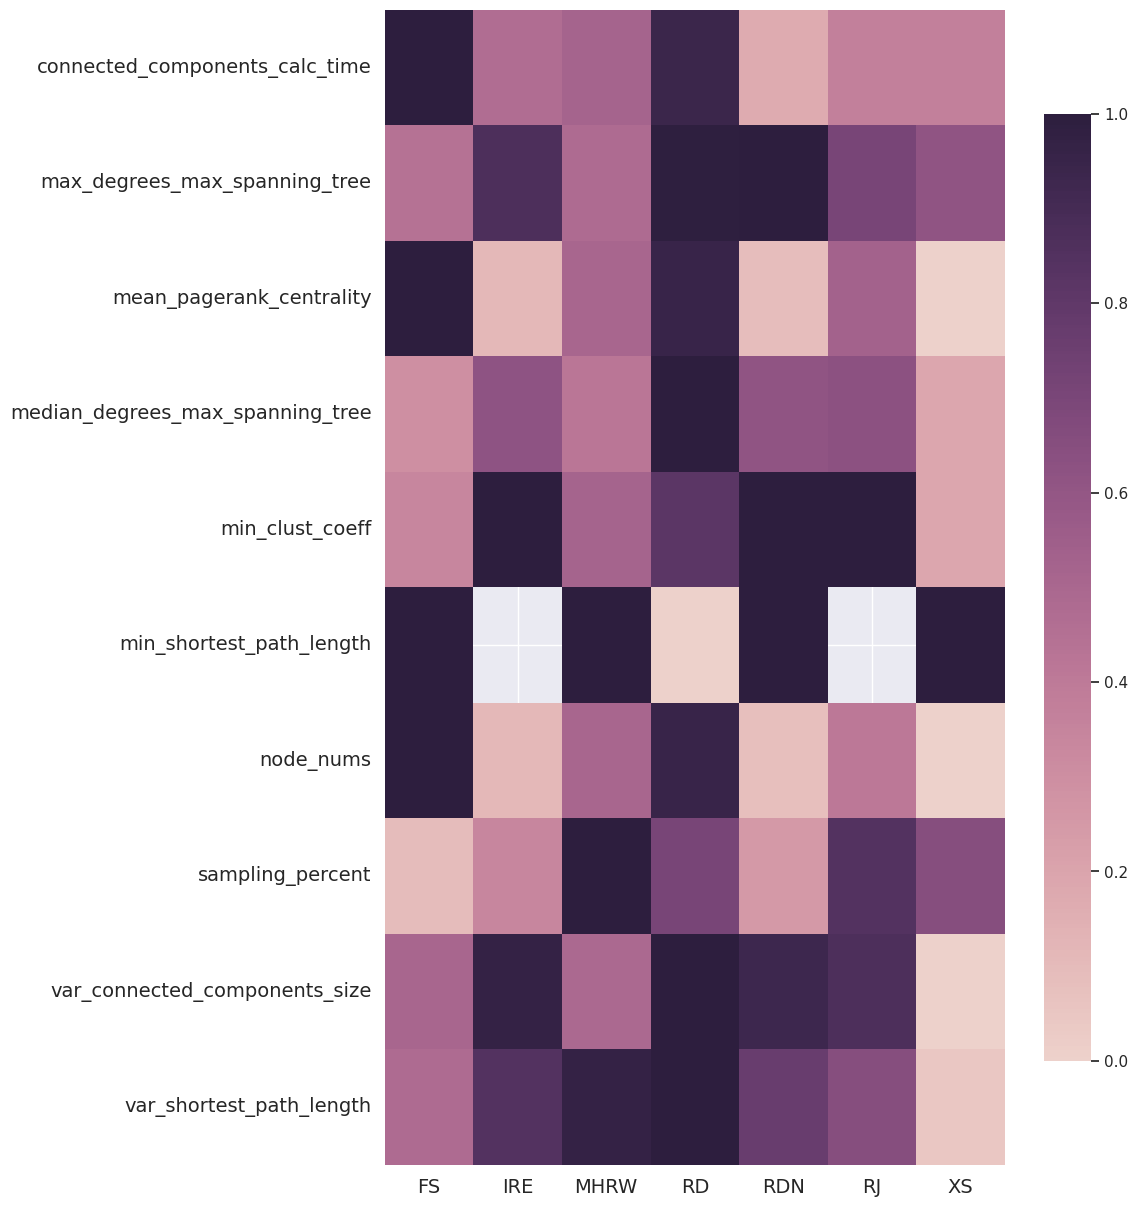

In [ ]:
matplotlib.rcParams['figure.figsize'] =10, 15
sns.set(font_scale=1)

df_all = [df_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'All'}), ff_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'FF'}), fs_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'FS'}), ire_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'IRE'}),  mhrw_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'MHRW'}),  rd_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RD'}),  rdn_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RDN'}),  re_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RE'}),  rj_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RJ'}),  rn_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RN'}),  rne_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'RNE'}),  sb_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'SB'}), xs_mi[['HPD2_LCC']].rename(columns={'HPD2_LCC': 'XS'})]
res = pd.concat(df_all, axis=1)
res = res.round(2)
#res = res.drop(['run_time', 'D3', 'C2D2', 'KS WCC sizes Distr', 'HPD2', 'HPD2_LCC', 'run_time var', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var', 'KS WCC sizes Distr var', 'GCCs RMSE'])
#res = res.drop(index=['EBC_max', 'ECC_min', 'ECC_max', 'ECC_med', 'FC_max', 'FC_med', 'SPL_med', 'SPL_max'])
res = res[(res > 0.99).any(axis=1) | (res < -0.99).any(axis=1)]
col_list = []
for col in res.columns:
  if (res[col] > 0.99).any() or (res[col] < -0.99).any():
    col_list.append(col)
print(col_list)
res_1 = res[col_list]
res_1 = res_1.round(2)
#res_1 = res_1.drop(['CC_max', 'CC_mean', 'CC_med', 'CC_min', 'DMST_med', 'DMST_var', 'Deg_mean',
#       'EBC_max', 'EBC_mean', 'EBC_med', 'EBC_min',
#       'ECC_max', 'ECC_mean', 'ECC_med', 'ECC_min',
#        'EIC_min', 'EIC_med', 'EIC_mean', 'EIC_max', 'FC_med', 'FC_mean' ,'FC_max', 'FC_min', 'NBC_max', 'NBC_mean', 'NBC_med', 'NBC_min',
#       'PRC_max', 'PRC_med', 'PRC_min', 'SPL_max', 'SPL_mean','SPL_min',
#      'SPL_var','deg_var', '|E|',
#       '|E|/|N|'])
heatmap = sns.heatmap(res_1, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar_kws={"shrink": .82})
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
#heatmap_d3.set_ylabel('Feature',fontdict={'fontsize':24})
heatmap.get_figure().savefig(root_folder + 'data/syn_graphs/aggr_data/results/MI/set_1_3_6_8_9_10_mi_heatmap_hpd2_lcc.png', dpi=400,  bbox_inches="tight")
# print features
high_corr_features_list = []
for feature in list(res_1.index):
  if feature in feature_mappings:
    feature = feature_mappings[feature]
  #if not 'calc_t' in feature:
  high_corr_features_list.append(feature)

print('features ', high_corr_features_list)

['FS', 'MHRW', 'RD', 'RDN', 'XS']
features  ['clust_coeff_calc_time', 'graph_density', 'max_connected_components_size', 'degree_max', 'degrees_spanning_tree_max', 'mean_connected_components_size', 'pagerank_centrality_avg', 'degrees_spanning_tree_median', 'node_betweenness_centrality_median', 'shortest_path_length_min', 'node_nums', 'num_connected_components', 'pagerank_centrality_calc_time', 'var_connected_components_size', 'degree_var', 'degrees_spanning_tree_var']


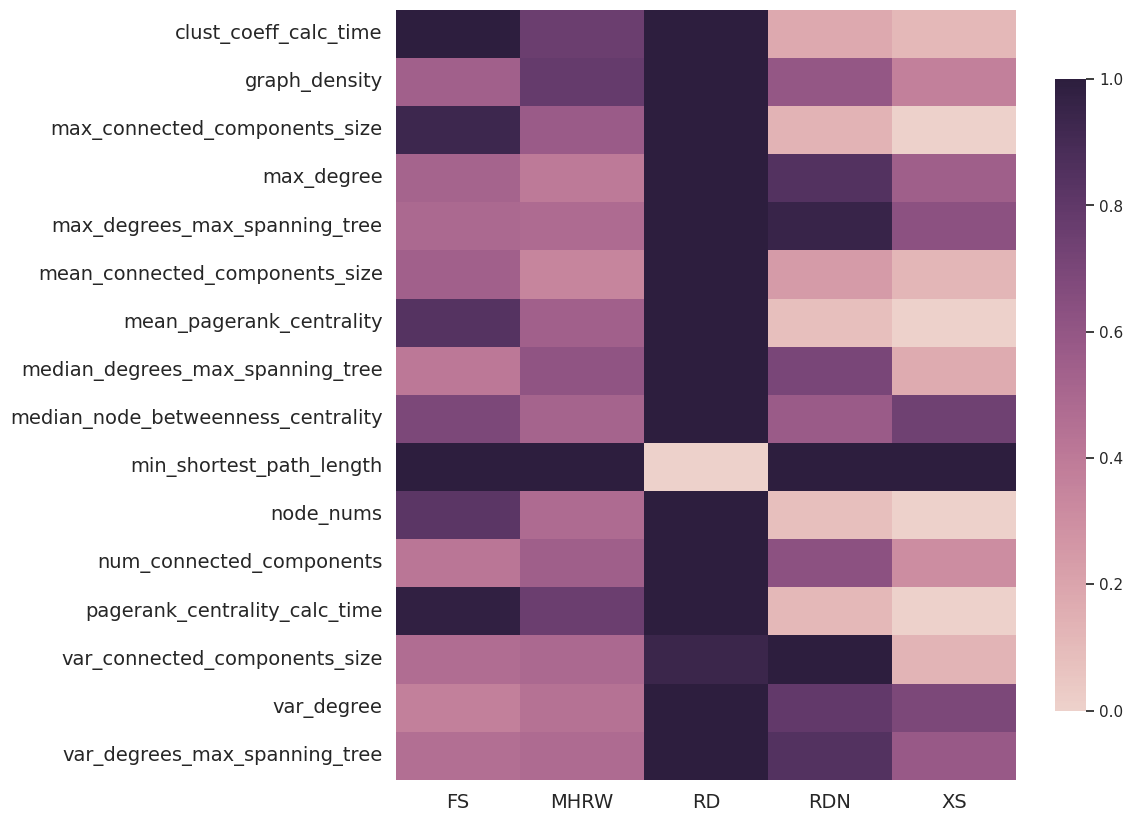

In [ ]:
matplotlib.rcParams['figure.figsize'] =10, 10
sns.set(font_scale=1)

df_all = [df_mi[['HPD2']].rename(columns={'HPD2': 'All'}), ff_mi[['HPD2']].rename(columns={'HPD2': 'FF'}), fs_mi[['HPD2']].rename(columns={'HPD2': 'FS'}), ire_mi[['HPD2']].rename(columns={'HPD2': 'IRE'}),  mhrw_mi[['HPD2']].rename(columns={'HPD2': 'MHRW'}),  rd_mi[['HPD2']].rename(columns={'HPD2': 'RD'}),  rdn_mi[['HPD2']].rename(columns={'HPD2': 'RDN'}),  re_mi[['HPD2']].rename(columns={'HPD2': 'RE'}),  rj_mi[['HPD2']].rename(columns={'HPD2': 'RJ'}),  rn_mi[['HPD2']].rename(columns={'HPD2': 'RN'}),  rne_mi[['HPD2']].rename(columns={'HPD2': 'RNE'}),  sb_mi[['HPD2']].rename(columns={'HPD2': 'SB'}),  xs_mi[['HPD2']].rename(columns={'HPD2': 'XS'})]
res = pd.concat(df_all, axis=1)
res = res.round(2)
#res = res.drop(['run_time', 'D3', 'C2D2', 'KS WCC sizes Distr', 'HPD2', 'HPD2_LCC', 'run_time var', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var', 'KS WCC sizes Distr var', 'GCCs RMSE'])
#res = res.drop(index=['EBC_max', 'ECC_min', 'ECC_max', 'ECC_med', 'FC_max', 'FC_med', 'SPL_med', 'SPL_max'])
res = res[(res > 0.99).any(axis=1) | (res < -0.99).any(axis=1)]
col_list = []
for col in res.columns:
  if (res[col] > 0.99).any() or (res[col] < -0.99).any():
    col_list.append(col)
print(col_list)
res_1 = res[col_list]
res_1 = res_1.round(2)
#res_1 = res_1.drop(['CC_max', 'CC_mean', 'CC_med', 'CC_min', 'DMST_med', 'DMST_var', 'Deg_mean',
#       'EBC_max', 'EBC_mean', 'EBC_med', 'EBC_min',
#       'ECC_max', 'ECC_mean', 'ECC_med', 'ECC_min',
#        'EIC_min', 'EIC_med', 'EIC_mean', 'EIC_max', 'FC_med', 'FC_mean' ,'FC_max', 'FC_min', 'NBC_max', 'NBC_mean', 'NBC_med', 'NBC_min',
#       'PRC_max', 'PRC_med', 'PRC_min', 'SPL_max', 'SPL_mean','SPL_min',
#      'SPL_var','deg_var', '|E|',
#       '|E|/|N|'])
heatmap = sns.heatmap(res_1, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar_kws={"shrink": .82})
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
#heatmap_d3.set_ylabel('Feature',fontdict={'fontsize':24})
heatmap.get_figure().savefig(root_folder + 'data/syn_graphs/aggr_data/results/MI/set_1_3_6_8_9_10_mi_heatmap_hpd2.png', dpi=400,  bbox_inches="tight")

# print features
high_corr_features_list = []
for feature in list(res_1.index):
  if feature in feature_mappings:
    feature = feature_mappings[feature]
  #if not 'calc_t' in feature:
  high_corr_features_list.append(feature)

print('features ', high_corr_features_list)

['All', 'FF', 'FS', 'IRE', 'MHRW', 'RD', 'RDN', 'RE', 'RJ', 'RN', 'RNE', 'SB', 'XS']
features  ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity_calc_time', 'edge_nums', 'eigenvector_centrality_calc_time', 'graph_density', 'max_connected_components_size', 'max_spanning_tree_calc_time', 'mean_connected_components_size', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg', 'pagerank_centrality_avg', 'median_connected_components_size', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median', 'min_connected_components_size', 'pagerank_centrality_min', 'shortest_path_length_min', 'node_nums', 'pagerank_centrality_calc_time', 'run_time var', 'sampling_percent', 'pagerank_centrality_var']


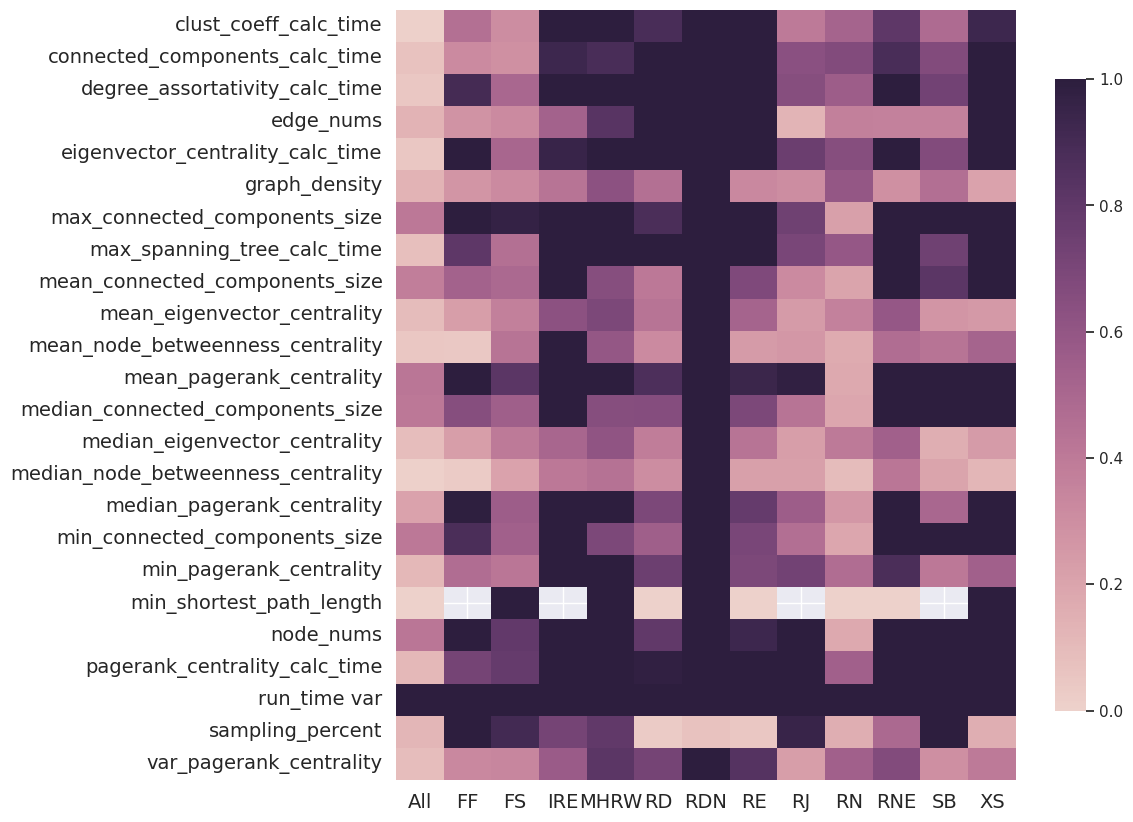

In [ ]:
matplotlib.rcParams['figure.figsize'] =10, 10
sns.set(font_scale=1)

df_all = [df_mi[['run_time']].rename(columns={'run_time': 'All'}), ff_mi[['run_time']].rename(columns={'run_time': 'FF'}), fs_mi[['run_time']].rename(columns={'run_time': 'FS'}), ire_mi[['run_time']].rename(columns={'run_time': 'IRE'}),  mhrw_mi[['run_time']].rename(columns={'run_time': 'MHRW'}),  rd_mi[['run_time']].rename(columns={'run_time': 'RD'}),  rdn_mi[['run_time']].rename(columns={'run_time': 'RDN'}),  re_mi[['run_time']].rename(columns={'run_time': 'RE'}),  rj_mi[['run_time']].rename(columns={'run_time': 'RJ'}),  rn_mi[['run_time']].rename(columns={'run_time': 'RN'}),  rne_mi[['run_time']].rename(columns={'run_time': 'RNE'}),  sb_mi[['run_time']].rename(columns={'run_time': 'SB'}),  xs_mi[['run_time']].rename(columns={'run_time': 'XS'})]
res = pd.concat(df_all, axis=1)
res = res.round(2)
#res = res.drop(['run_time', 'D3', 'C2D2', 'KS WCC sizes Distr', 'HPD2', 'HPD2_LCC', 'run_time var', 'KS Degree Distr var', 'KS Clustering Coefficient Distr var', 'KS WCC sizes Distr var', 'GCCs RMSE'])
#res = res.drop(index=['EBC_max', 'ECC_min', 'ECC_max', 'ECC_med', 'FC_max', 'FC_med', 'SPL_med', 'SPL_max'])
res = res[(res > 0.99).any(axis=1) | (res < -0.99).any(axis=1)]
col_list = []
for col in res.columns:
  if (res[col] > 0.99).any() or (res[col] < -0.99).any():
    col_list.append(col)
print(col_list)
res_1 = res[col_list]
res_1 = res_1.round(2)
#res_1 = res_1.drop(['CC_max', 'CC_mean', 'CC_med', 'CC_min', 'DMST_med', 'DMST_var', 'Deg_mean',
#       'EBC_max', 'EBC_mean', 'EBC_med', 'EBC_min',
#       'ECC_max', 'ECC_mean', 'ECC_med', 'ECC_min',
#        'EIC_min', 'EIC_med', 'EIC_mean', 'EIC_max', 'FC_med', 'FC_mean' ,'FC_max', 'FC_min', 'NBC_max', 'NBC_mean', 'NBC_med', 'NBC_min',
#       'PRC_max', 'PRC_med', 'PRC_min', 'SPL_max', 'SPL_mean','SPL_min',
#      'SPL_var','deg_var', '|E|',
#       '|E|/|N|'])
heatmap = sns.heatmap(res_1, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar_kws={"shrink": .82})
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
#heatmap_d3.set_ylabel('Feature',fontdict={'fontsize':24})
heatmap.get_figure().savefig(root_folder + 'data/syn_graphs/aggr_data/results/MI/set_1_3_6_8_9_10_mi_heatmap_run_time.png', dpi=400,  bbox_inches="tight")
# print features
high_corr_features_list = []
for feature in list(res_1.index):
  if feature in feature_mappings:
    feature = feature_mappings[feature]
  #if not 'calc_t' in feature:
  high_corr_features_list.append(feature)

print('features ', high_corr_features_list)